In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf 
import pickle
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Car_Purchasing_Data.csv", encoding='latin1')
df

Customer Name                                    Customer e-mail  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          Country  Gender        Age  Annual Salary  Credit Card Debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.89292       9572.957136   
2         Algeria       1  43.152897    53798.55112      11160.355060   
3    Cook Islands       1  58.271369    79370.03798      14426.164850   
4          Brazil       1  57.313749    59729.15130       5358.712177   
..            ...     ...        ...            ...               ...   
495         Nepal       0  41.462515    71942.40291       6995.902524   
496      Zimbabwe       1  37.642000    56039.49793      12301.456790   
497   Philippines       1  53.943497    68888.77805      10611.606860   
498      Botswana       1  59.160509    49811.99062      14013.034510   
499        marlal       1  46.731152    61370.67766       9391.341628   

       Net Worth  Car Purchase Amount  
0    238961.2505          35321.45877  
1    530973.9078          45115.52566  
2    638467.1773          42925.70921  
3    548599.0524          67422.36313  
4    560304.0671          55915.46248  
..           ...                  ...  
495  541670.1016          48901.44342  
496  360419.0988          31491.41457  
497  764531.3203          64147.28888  
498  337826.6382          45442.15353  
499  462946.4924          45107.22566  

[500 rows x 9 columns]

In [3]:
df.head(5)

Customer Name                                    Customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        Country  Gender        Age  Annual Salary  Credit Card Debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     Net Worth  Car Purchase Amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773          42925.70921  
3  548599.0524          67422.36313  
4  560304.0671          55915.46248

In [4]:
df.tail(5)

Customer Name                     Customer e-mail      Country  Gender  \
495        Walter                 ligula@Cumsociis.ca        Nepal       0   
496         Vanna  Cum.sociis.natoque@Sedmolestie.edu     Zimbabwe       1   
497         Pearl       penatibus.et@massanonante.com  Philippines       1   
498          Nell   Quisque.varius@arcuVivamussit.net     Botswana       1   
499         Marla           Camaron.marla@hotmail.com       marlal       1   

           Age  Annual Salary  Credit Card Debt    Net Worth  \
495  41.462515    71942.40291       6995.902524  541670.1016   
496  37.642000    56039.49793      12301.456790  360419.0988   
497  53.943497    68888.77805      10611.606860  764531.3203   
498  59.160509    49811.99062      14013.034510  337826.6382   
499  46.731152    61370.67766       9391.341628  462946.4924   

     Car Purchase Amount  
495          48901.44342  
496          31491.41457  
497          64147.28888  
498          45442.15353  
499          45107.22566

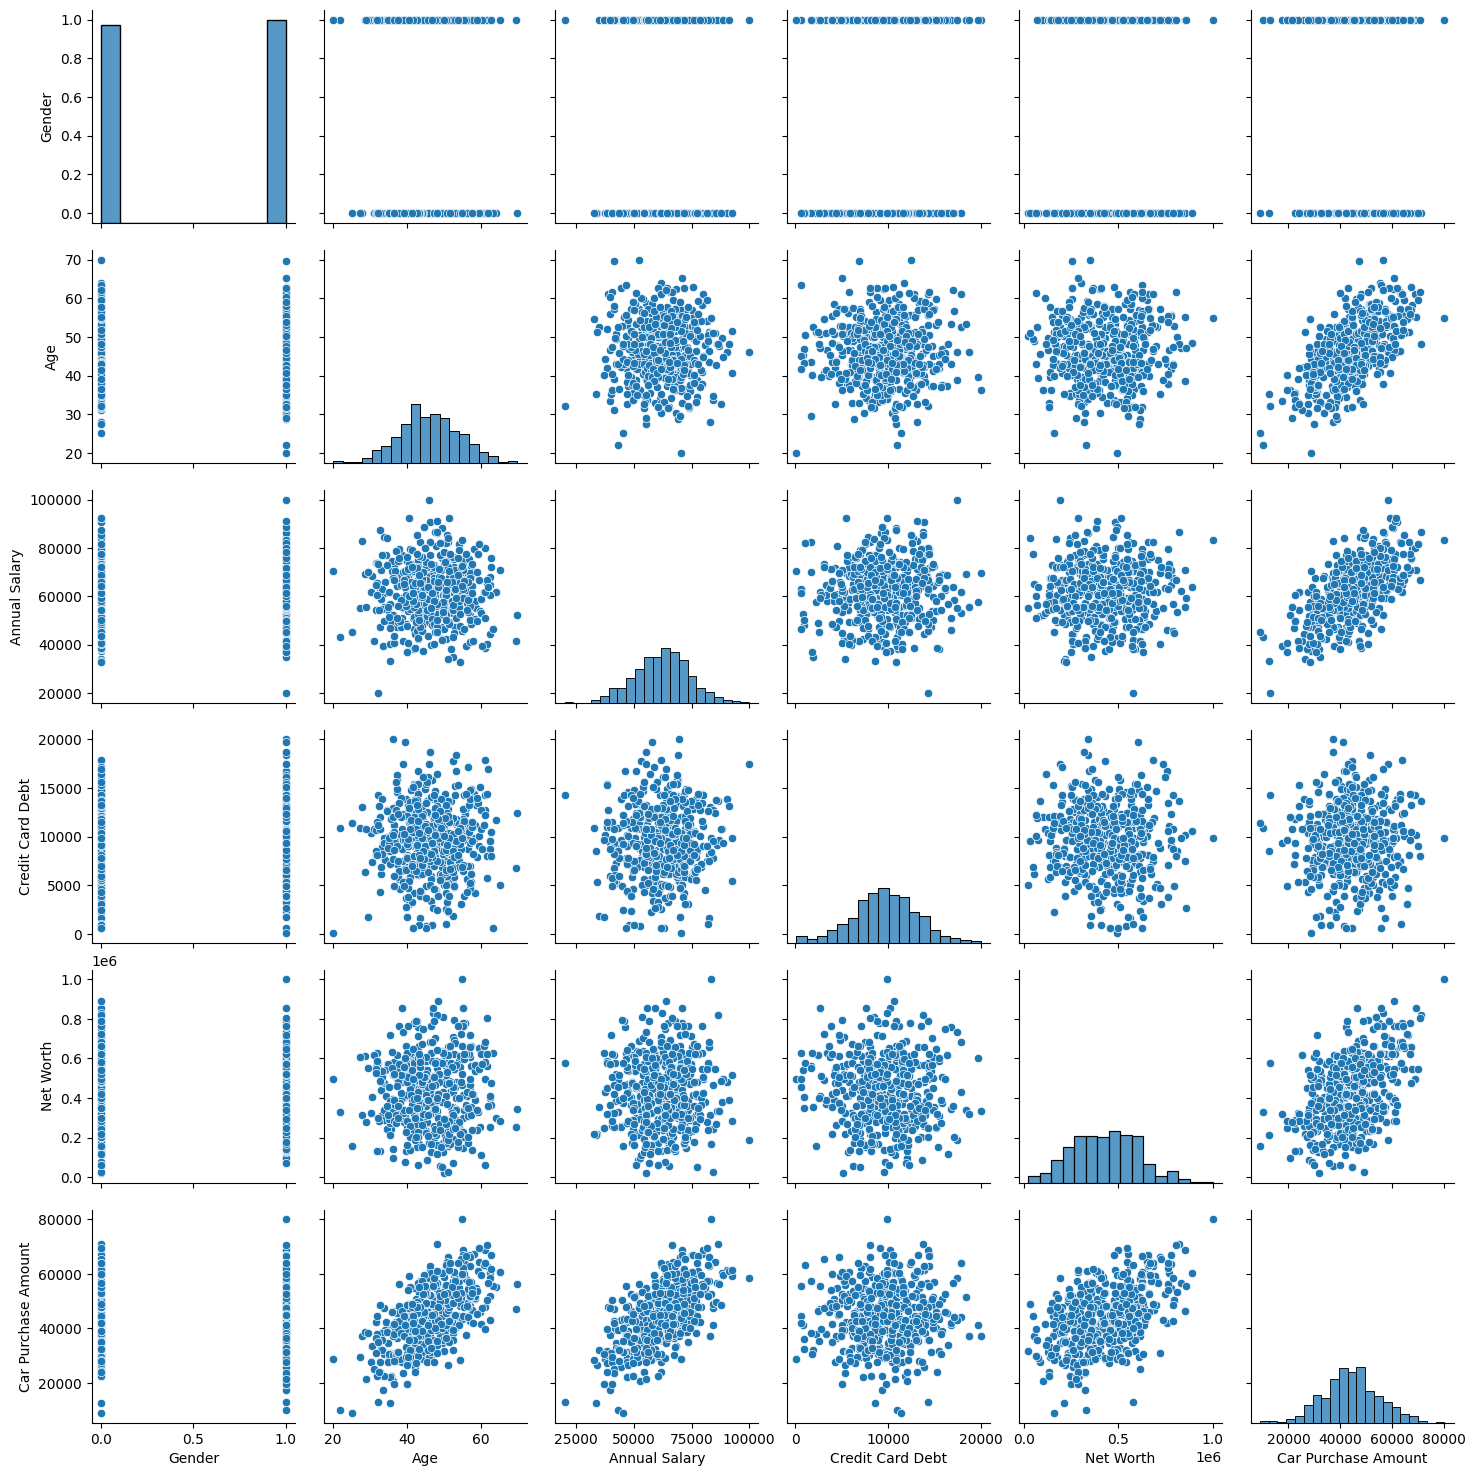

In [5]:
sns.pairplot(df)

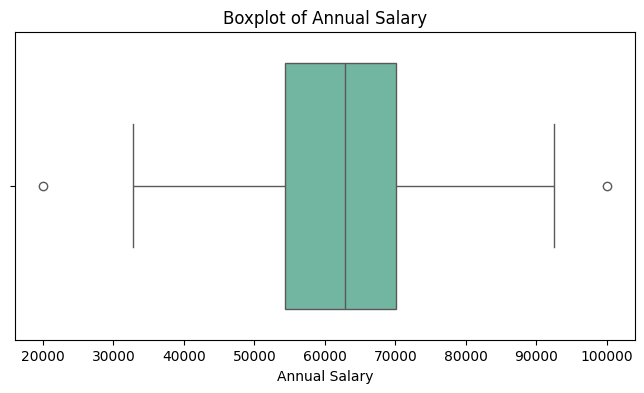

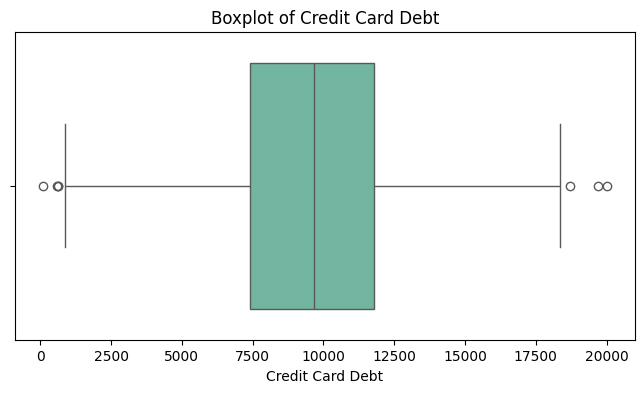

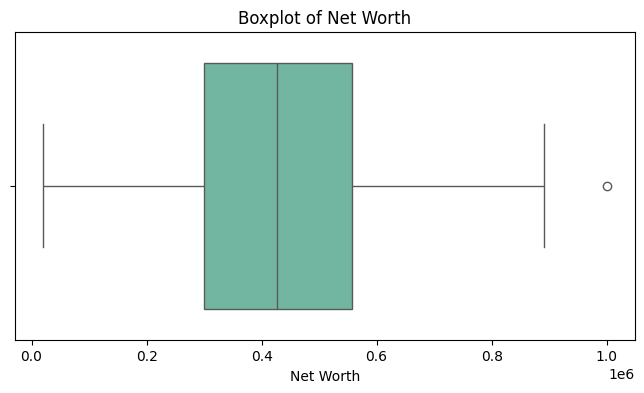

In [6]:

cols = ['Annual Salary', 'Credit Card Debt', 'Net Worth']

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, palette='Set2')
    plt.title(f'Boxplot of {col}')
    plt.show()


In [7]:
df.sum().isnull()

Customer Name          False
Customer e-mail        False
Country                False
Gender                 False
Age                    False
Annual Salary          False
Credit Card Debt       False
Net Worth              False
Car Purchase Amount    False
dtype: bool

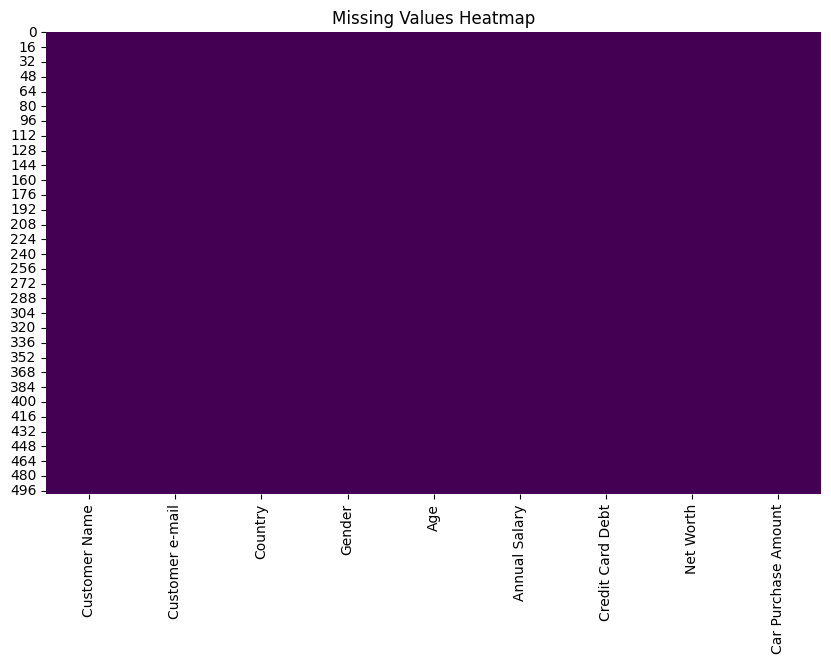

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
df.describe()

Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000

In [10]:
df['Country'].value_counts()

Country
Mauritania                                      6
Israel                                          6
Bolivia                                         6
Kyrgyzstan                                      5
Samoa                                           5
                                               ..
Ukraine                                         1
New Zealand                                     1
Saint Helena, Ascension and Tristan da Cunha    1
Malaysia                                        1
marlal                                          1
Name: count, Length: 211, dtype: int64

In [11]:
X = df.drop(['Customer Name', 'Customer e-mail', 'Country'], axis=1)

In [12]:
X.head()

Gender        Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0  41.851720    62812.09301      11609.380910  238961.2505   
1       0  40.870623    66646.89292       9572.957136  530973.9078   
2       1  43.152897    53798.55112      11160.355060  638467.1773   
3       1  58.271369    79370.03798      14426.164850  548599.0524   
4       1  57.313749    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          42925.70921  
3          67422.36313  
4          55915.46248

In [13]:
y = df['Car Purchase Amount']

In [14]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [15]:
X.shape

(500, 6)

In [16]:
y.shape

(500,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(400, 6)

In [19]:
y_train.shape

(400,)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train

array([[-1.        , -1.22996274,  0.70264523,  0.06782569,  1.14322143,
         0.20200752],
       [ 1.        , -0.76993543, -0.49583563, -0.85967664, -1.16188481,
        -1.33119912],
       [-1.        ,  1.58484034, -0.55624875,  1.05701072,  0.76354398,
         1.00408083],
       ...,
       [-1.        , -0.08676592,  0.13289634, -1.67932755,  1.00304384,
         0.49854197],
       [ 1.        ,  1.48934693, -1.73041723, -0.39436898, -0.06165717,
        -0.16668704],
       [ 1.        , -1.92977493,  0.53060764, -0.63911954, -0.15781448,
        -0.95091968]])

In [22]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential()

model.add(Dense(units=100, input_dim=6, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,801 (22.66 KB)

 Trainable params: 5,801 (22.66 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])

In [26]:
epoch_hist = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=25,
    verbose=1,
    validation_split=0.2
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2058760960.0000 - mean_absolute_error: 43728.4141 - val_loss: 1938666112.0000 - val_mean_absolute_error: 42925.2422
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2066411008.0000 - mean_absolute_error: 44213.4648 - val_loss: 1938579200.0000 - val_mean_absolute_error: 42924.2422
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2070599808.0000 - mean_absolute_error: 44042.6719 - val_loss: 1938452864.0000 - val_mean_absolute_error: 42922.8047
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2108473856.0000 - mean_absolute_error: 44389.9414 - val_loss: 1938266112.0000 - val_mean_absolute_error: 42920.6914
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2104492032.0000 - mean_absolute_error: 44528.5977 - val_loss: 1937996800.0000 - val_mean_absolute_error: 42917.6680
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2049053568.0000 - mean_absolute_error: 44033.4375 - val_loss: 193

In [27]:
epoch_hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

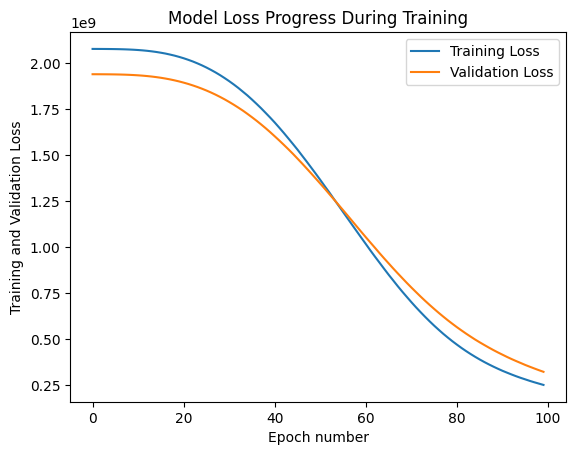

In [28]:
plt.plot(epoch_hist.history['loss'])
plt.plot(epoch_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [33]:
X_test = np.array([[1, 50, 50000, 10000, 2000020000, 600]])
y_pred = model.predict(X_test)

print('Expected Purchase Amount', y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Expected Purchase Amount [[1.9458532e+13]]
